In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [8]:
filepath = "D:\Academics\D\Kaggle DataSets\kc_house_data.csv"

In [29]:
df = pd.read_csv(filepath)

In [21]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [31]:
df = df.drop(columns = ['id'])

In [25]:
df['bedrooms'].isnull().sum()

0

In [26]:
df['bathrooms'].isnull().sum()

0

In [32]:
data_grp = df['floors']
value_count_flr = data_grp.value_counts()
df_floor = value_count_flr.to_frame()

In [33]:
df_floor

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


<AxesSubplot:xlabel='waterfront', ylabel='price'>

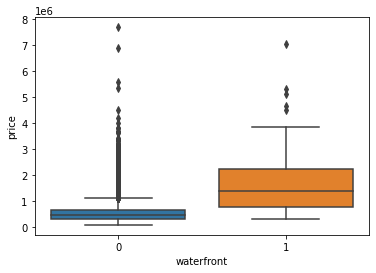

In [34]:
sns.boxplot(x = 'waterfront', y='price', data = df)
#comparing the prices with and without the waterfront 

We observe that having a waterfront increases the median price of the house.

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

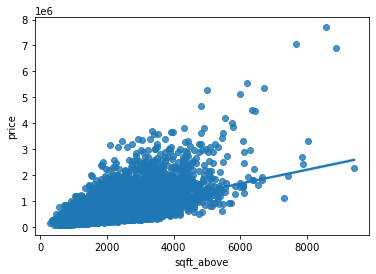

In [35]:
sns.regplot(x= 'sqft_above', y='price',data = df)

We observe a positive correlation with the sqft_above 

In [36]:
X = df[['sqft_living']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X,Y) # R^2 score calculation

0.4928532179037931

In [37]:
## We see this score to be decent but requires improvement and will make sure it tends to one

Will try to fit the multiple linear regression model

In [38]:
features = ['floors','waterfront','lat','bedrooms','sqft_basement','view','bathrooms','sqft_living15','sqft_above','grade','sqft_living']

In [39]:
mlr = LinearRegression()
Z = df[features]
mlr.fit(Z,Y)
mlr.score(Z,Y)

0.6577114575107166

Now I will create a pipeline object that scales the data,perform a polynomial transform and fit this linear regression model.

In [41]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [42]:
pipe = Pipeline(Input)
Z = df[features]
pipe.fit(Z,Y)
pipe.score(Z,Y)

0.7497904706534935

We observe improvement in R^2 value

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [46]:
#splitting the data into training and test data
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)



In [43]:
from sklearn.linear_model import Ridge

In [47]:
RidgeModel = Ridge(alpha = 0.1)
RidgeModel.fit(x_train,y_train)
RidgeModel.score(x_test,y_test)

0.6480374087702232

In [48]:
# Performing polynomial regression
pr = PolynomialFeatures(degree = 2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeM2 = Ridge(alpha = 0.1)
RidgeM2.fit(x_train_pr,y_train)
RidgeM2.score(x_test_pr,y_test)

0.7004432039580304

This concludes the test of various models for predicting the House Prices.
Will try to make a complete model which can take other data sets.